In [1]:
from __future__ import print_function
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
%matplotlib inline
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
import os

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir('E:/Practical Time Series')

In [3]:
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')

In [4]:
ibm_df.head()

,Date,IBM common stock closing prices
0,1/2/1962,572.00
1,1/3/1962,577.00
2,1/4/1962,571.25
3,1/5/1962,560.00
4,1/8/1962,549.50


In [5]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)

In [6]:
ibm_df.head()

,Date,Close_Price
0,1/2/1962,572.00
1,1/3/1962,577.00
2,1/4/1962,571.25
3,1/5/1962,560.00
4,1/8/1962,549.50


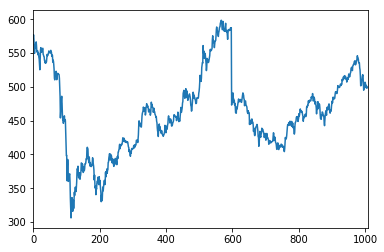

In [7]:
ibm_df.Close_Price.plot()

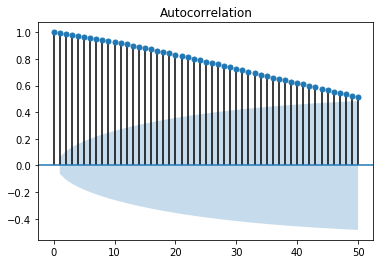

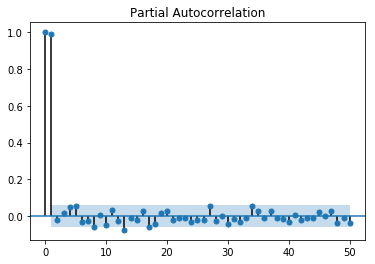

In [8]:
ibm_df['residual']=ibm_df['Close_Price']-ibm_df['Close_Price'].mean()
ibm_df=ibm_df.dropna()
plot_acf(ibm_df.Close_Price, lags=50)
x = plot_pacf(ibm_df.Close_Price, lags=50)

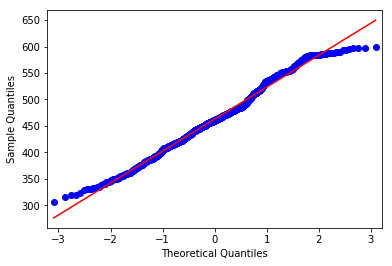

In [9]:
x = sm.qqplot(ibm_df['Close_Price'], line='s')

In [10]:
aicVal=[]
for ari in range(1, 3):
    for maj in range(0,3):
        arma_obj = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc') 
        aicVal.append([ari, maj, arma_obj.aic])

In [11]:
arma_obj_fin = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(1, 0)).fit(maxlag=30, method='mle', trend='nc') 
ibm_df['ARMA']=arma_obj_fin.predict()
arma_obj_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(1, 0)   Log Likelihood               -3349.383
Method:                           mle   S.D. of innovations              6.683
Date:                Fri, 08 Dec 2017   AIC                           6702.767
Time:                        17:39:54   BIC                           6712.598
Sample:                             0   HQIC                          6706.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   9222.316      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Text(0,0.5,'Closing price')

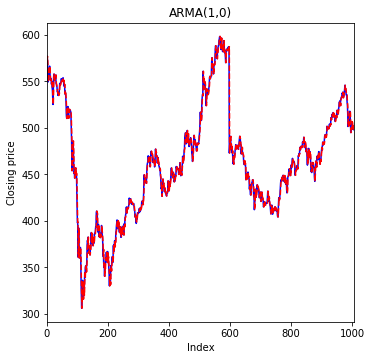

In [12]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price')